<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data

# Problem Statement

<li> We want to predict the price of a house at sale.
<li> We want to create a regression model to predict the sale price using the 70 over columns of different features.
<li> We want to identify the features that affect the sale price of the house the most.
<li> Ultimately, model can be used to assist homeowners to know how to increase house prices through home improvements.
<br><br>
After Data Cleaning, Pre-Processing and Modelling, we will analyse the RMSE and $R^2$ scores using RidgeCV, LassoCV and ElasticNetCV models.

# Data Cleaning

The data is from <a href="https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge">Kaggle</a> and the data dictionary can be reviewed <a href="http://jse.amstat.org/v19n3/decock/DataDocumentation.txt">here</a>. Ames Housing Dataset is from the Ames Assessor’s Office and it has information on residential properties sold in Ames (Iowa) from 2006 to 2010.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('./datasets/train.csv', index_col = 'Id')

In [3]:
print(data_train.keys())
print(data_train.shape)
data_train.head()

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Understanding Data

There are a lot of features - 81 to be exact. So we will need to see what the missing values mean, and whether to drop it or not.

In [4]:
pd.options.display.min_rows = 81
data_train.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

Now, we want to check on (any) missing values. Turns out, there are a lot.

In [5]:
data_train.isna().sum().sort_values(ascending=False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Qual         114
Garage Yr Blt       114
Garage Cond         114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
Bsmt Cond            55
Bsmt Qual            55
BsmtFin Type 1       55
Mas Vnr Area         22
Mas Vnr Type         22
Bsmt Full Bath        2
Bsmt Half Bath        2
Garage Area           1
Garage Cars           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
                   ... 
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type       

### Check for Outliers

Based on the data dictionary for categorical features, instead of being translated into NA, it has been translated into nan. Hence, we should not drop any of the rows yet.

Now, let's analyse and see if there are any outliers in the data by viewing the features 20 by 20.

In [6]:
data_train.iloc[:, :20].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PID,2051.0,NaN,NaN,NaN,713590006.091663,188691837.88533,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,NaN,NaN,NaN,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
MS Zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,1721.0,NaN,NaN,NaN,69.0552,23.260653,21.0,58.0,68.0,80.0,313.0
Lot Area,2051.0,NaN,NaN,NaN,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
Street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,140,2,Grvl,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,2051,4,Reg,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,2051,4,Lvl,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2051,3,AllPub,2049,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_train.iloc[:, 20:40].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year Remod/Add,2051.0,NaN,NaN,NaN,1984.190151,21.03625,1950.0,1964.5,1993.0,2004.0,2010.0
Roof Style,2051,6,Gable,1619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roof Matl,2051,6,CompShg,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior 1st,2051,15,VinylSd,724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior 2nd,2051,15,VinylSd,721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Type,2029,4,None,1218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Area,2029.0,NaN,NaN,NaN,99.695909,174.963129,0.0,0.0,0.0,161.0,1600.0
Exter Qual,2051,4,TA,1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exter Cond,2051,5,TA,1778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foundation,2051,6,PConc,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_train.iloc[:, 40:60].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Heating QC,2051,5,Ex,1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central Air,2051,2,Y,1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrical,2051,5,SBrkr,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Flr SF,2051.0,NaN,NaN,NaN,1164.488055,396.446923,334.0,879.5,1093.0,1405.0,5095.0
2nd Flr SF,2051.0,NaN,NaN,NaN,329.329108,425.671046,0.0,0.0,0.0,692.5,1862.0
Low Qual Fin SF,2051.0,NaN,NaN,NaN,5.512921,51.06887,0.0,0.0,0.0,0.0,1064.0
Gr Liv Area,2051.0,NaN,NaN,NaN,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
Bsmt Full Bath,2049.0,NaN,NaN,NaN,0.427526,0.522673,0.0,0.0,0.0,1.0,3.0
Bsmt Half Bath,2049.0,NaN,NaN,NaN,0.063446,0.251705,0.0,0.0,0.0,0.0,2.0
Full Bath,2051.0,NaN,NaN,NaN,1.577279,0.549279,0.0,1.0,2.0,2.0,4.0


In [9]:
data_train.iloc[:, 60:].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Garage Finish,1937,3,Unf,849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cars,2050.0,NaN,NaN,NaN,1.776585,0.764537,0.0,1.0,2.0,2.0,5.0
Garage Area,2050.0,NaN,NaN,NaN,473.671707,215.934561,0.0,319.0,480.0,576.0,1418.0
Garage Qual,1937,5,TA,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cond,1937,5,TA,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paved Drive,2051,3,Y,1861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wood Deck SF,2051.0,NaN,NaN,NaN,93.83374,128.549416,0.0,0.0,0.0,168.0,1424.0
Open Porch SF,2051.0,NaN,NaN,NaN,47.556802,66.747241,0.0,0.0,27.0,70.0,547.0
Enclosed Porch,2051.0,NaN,NaN,NaN,22.571916,59.84511,0.0,0.0,0.0,0.0,432.0
3Ssn Porch,2051.0,NaN,NaN,NaN,2.591419,25.229615,0.0,0.0,0.0,0.0,508.0


There are no outliers or negative values found for the all the 81 features.

### Categorical Data
These are the categorical features which are on a scale and the respective missing values.

Pool QC - 2042<br>
Misc Feature - 1986<br>
Alley - 1911<br>
Fence - 1651<br>
Fireplace Qu - 1000<br>
Garage Finish - 114<br>
Garage Qual - 114<br>
Garage Cond - 114<br>
Garage Type - 113<br>
Bsmt Exposure - 58<br>
BsmtFin Type 2 - 56<br>
BsmtFin Type 1 - 55<br>
Bsmt Cond - 55<br>
Bsmt Qual - 55<br>
Mas Vnr Type - 22<br>

Data that have less than 60% data are dropped.

In [10]:
data_train.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu', 'PID'], inplace=True)

In all of the categorical features which have "missing values", it is observed that the the negative option/absence of the category i.e. no garage/no pool, has been translated into nan instead of NA with the exception of 'Mas Vnr Type'. First, we will proceed to replace nan with NA in the other features.

In [11]:
data_train['Bsmt Exposure'].replace(np.nan, 'NA', inplace=True)

In [12]:
data_train['BsmtFin Type 2'].replace(np.nan, 'NA', inplace=True)

In [13]:
data_train['BsmtFin Type 1'].replace(np.nan, 'NA', inplace=True)

In [14]:
data_train['Garage Finish'].replace(np.nan, 'NA', inplace=True)

In [15]:
data_train['Garage Qual'].replace(np.nan, 'NA', inplace=True)

In [16]:
data_train['Garage Cond'].replace(np.nan, 'NA', inplace=True)

In [17]:
data_train['Garage Type'].replace(np.nan, 'NA', inplace=True)

In [18]:
data_train['Bsmt Qual'].replace(np.nan, 'NA', inplace=True)

In [19]:
data_train['Bsmt Cond'].replace(np.nan, 'NA', inplace=True)

A little paranoid, so I will check whether the missing values have been replaced to 'NA'. 

In [20]:
data_train.isna().sum().sort_values(ascending=False)

Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Full Bath       2
Bsmt Half Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Kitchen Qual         0
TotRms AbvGrd        0
MS SubClass          0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Functional           0
Gr Liv Area          0
Low Qual Fin SF      0
Full Bath            0
Garage Type          0
Fireplaces           0
3Ssn Porch           0
Sale Type            0
Yr Sold              0
Mo Sold              0
Misc Val             0
Pool Area            0
                  ... 
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Con

Yes, they have! Now, we're left with 'Mas Vnr Type'. The options for this feature are BrkCmn (Brick Common), BrkFace (Brick Face), CBlock (Cinder Block), None and Stone. 

In [21]:
data_train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

Hence, we will proceed to drop the 22 rows. It is only about 1% about the training set, which we hope won't affect the training model too much.

In [22]:
data_train.dropna(subset=['Mas Vnr Type'], inplace=True)

Again, we'll check whether the np.nan values in 'Mas Vnr Type' has been dropped.

In [23]:
data_train.isna().sum().sort_values(ascending=False)

Lot Frontage       324
Garage Yr Blt      113
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
Bedroom AbvGr        0
TotRms AbvGrd        0
Kitchen Qual         0
Kitchen AbvGr        0
Full Bath            0
Half Bath            0
2nd Flr SF           0
Fireplaces           0
Gr Liv Area          0
Low Qual Fin SF      0
Functional           0
MS SubClass          0
Garage Type          0
3Ssn Porch           0
Sale Type            0
Yr Sold              0
Mo Sold              0
Misc Val             0
Pool Area            0
Screen Porch         0
                  ... 
House Style          0
Bldg Type            0
Condition 2          0
Condition 1          0
Land Slope           0
Heating QC           0
Lot Config           0
Utilities            0
Land Contour         0
Lot Shape            0
Street               0
Lot Area             0
Year Built 

Sidenote: It has also dropped 'Mas Vnr Area'.

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 109 to 10
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2029 non-null   int64  
 1   MS Zoning        2029 non-null   object 
 2   Lot Frontage     1705 non-null   float64
 3   Lot Area         2029 non-null   int64  
 4   Street           2029 non-null   object 
 5   Lot Shape        2029 non-null   object 
 6   Land Contour     2029 non-null   object 
 7   Utilities        2029 non-null   object 
 8   Lot Config       2029 non-null   object 
 9   Land Slope       2029 non-null   object 
 10  Neighborhood     2029 non-null   object 
 11  Condition 1      2029 non-null   object 
 12  Condition 2      2029 non-null   object 
 13  Bldg Type        2029 non-null   object 
 14  House Style      2029 non-null   object 
 15  Overall Qual     2029 non-null   int64  
 16  Overall Cond     2029 non-null   int64  
 17  Year Built    

### Int to Str

MSSubClass is wrongly categorised as an integer. We will change it into a string and will dummify it later on.

In [25]:
data_train['MS SubClass'] = data_train['MS SubClass'].map(lambda x: str(x))

#### Rename Columns

In [26]:
data_train.columns = data_train.columns.str.strip()

In [27]:
n_col = data_train.columns
rename_dict = {}
for col in n_col: 
    rename_dict[col] = col.lower().replace(' ', "")

data_train.rename(columns = rename_dict, inplace = True)
data_train.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremod/add', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf

We will change the variables into dummy coded variables.

In [28]:
## creating an ordinal dictionary
qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
bsmtexposure_qual = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA':0}
bsmtfintype1_qual = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
centralair_qual = {'N': 0, 'Y': 1}

In [29]:
data_train['exterqual'] = data_train['exterqual'].map(qual)
data_train['extercond'] = data_train['extercond'].map(qual)
data_train['bsmtqual'] = data_train['bsmtqual'].map(qual)
data_train['bsmtcond'] = data_train['bsmtcond'].map(qual)
data_train['heatingqc'] = data_train['heatingqc'].map(qual)
data_train['kitchenqual'] = data_train['kitchenqual'].map(qual)
data_train['garagequal'] = data_train['garagequal'].map(qual)
data_train['garagecond'] = data_train['garagecond'].map(qual)

data_train['bsmtexposure'] = data_train['bsmtexposure'].map(bsmtexposure_qual)
data_train['bsmtfintype1'] = data_train['bsmtfintype1'].map(bsmtfintype1_qual)
data_train['centralair'] = data_train['centralair'].map(centralair_qual)

In [30]:
data_train.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,saleprice
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,3,2010,WD,138500


### Continuous Data

After going through the missing values in categorical features, these are the remaining continuous features which are on a scale and have respective missing values.

Lot Frontage - 324<br>
Garage Yr Blt - 113<br>
Bsmt Full Bath - 2<br>
Bsmt Half Bath - 2<br>
Garage Cars - 1<br>
Total Bsmt SF - 1<br>
Bsmt Unf SF - 1<br>
BsmtFin SF 2 - 1<br>
BsmtFin SF 1 - 1<br>
Garage Area - 1

#### Lot Frontage

In [31]:
data_train['lotfrontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 100.,  92.,
        65.,  75.,  60.,  30.,  79.,  41., 105.,  81.,  36.,  63.,  32.,
        94.,  44.,  50.,  48.,  88.,  83.,  53.,  58., 103.,  57.,  52.,
        87., 134.,  56.,  67.,  54., 140.,  78.,  85.,  90.,  96.,  62.,
        49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,  51.,
        69., 107.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

Lot Frontage (Linear feet of street connected to property) - For the rows with nan, we will replace nan with 0. At first thought, I would have replaced all np.nan values with 0. However, most houses would have some linear feet of street connected to the property. With that, I would impute the mean into the rows with np.nan.

In [32]:
mean_lot_frontage = data_train['lotfrontage'].mean()
mean_lot_frontage

68.99824046920821

In [33]:
data_train['lotfrontage'] = data_train['lotfrontage'].fillna(mean_lot_frontage)

In [34]:
data_train.isna().sum().sort_values(ascending=False)

garageyrblt      113
bsmtfullbath       2
bsmthalfbath       2
totalbsmtsf        1
bsmtunfsf          1
bsmtfinsf2         1
bsmtfinsf1         1
garagecars         1
garagearea         1
halfbath           0
kitchenqual        0
kitchenabvgr       0
bedroomabvgr       0
mssubclass         0
fullbath           0
functional         0
grlivarea          0
lowqualfinsf       0
2ndflrsf           0
1stflrsf           0
totrmsabvgrd       0
garagetype         0
fireplaces         0
3ssnporch          0
saletype           0
yrsold             0
mosold             0
miscval            0
poolarea           0
screenporch        0
                ... 
bldgtype           0
condition2         0
condition1         0
neighborhood       0
lotconfig          0
mszoning           0
utilities          0
landcontour        0
lotshape           0
street             0
lotarea            0
lotfrontage        0
overallcond        0
yearbuilt          0
yearremod/add      0
roofstyle          0
roofmatl     

#### Garage Yr Blt

With those rows with nan, we will replace nan with 0.

In [35]:
data_train['garageyrblt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 1978., 1954., 1935., 1951., 1996.,
       1999., 1920., 1930., 2006., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 1933., 1895.,
       1919.])

In [36]:
data_train['garageyrblt'].replace(np.nan, 0, inplace=True)

#### Basement Full Bath and Basement Half Baths

In [37]:
print(data_train['bsmtfullbath'].unique())
data_train[data_train['bsmtfullbath'].isna()]['bsmthalfbath']

[ 0.  1.  2. nan  3.]


Id
1498   NaN
1342   NaN
Name: bsmthalfbath, dtype: float64

We are not sure of the data source for these 2 features and we cannot assume that they all do not have full and half baths, so we shall drop the 2 rows.

In [38]:
data_train.dropna(subset=['bsmtfullbath', 'bsmthalfbath'], inplace=True)

In [39]:
data_train.shape

(2027, 74)

#### Garage Cars

In [40]:
data_train['garagecars'].unique()

array([ 2.,  1.,  3.,  0.,  4.,  5., nan])

In [41]:
data_train[data_train['garagecars'].isna()].T

Id,2237
mssubclass,70
mszoning,RM
lotfrontage,50.0
lotarea,9060
street,Pave
lotshape,Reg
landcontour,Lvl
utilities,AllPub
lotconfig,Inside
landslope,Gtl


For this, we can input 0 as there is no garage built.

In [42]:
data_train['garagecars'].replace(np.nan, 0, inplace=True)

#### Garage Area

In [43]:
data_train.isna().sum().sort_values(ascending=False)

garagearea       1
mssubclass       0
fullbath         0
functional       0
totrmsabvgrd     0
kitchenqual      0
kitchenabvgr     0
bedroomabvgr     0
halfbath         0
bsmthalfbath     0
garagetype       0
bsmtfullbath     0
grlivarea        0
lowqualfinsf     0
2ndflrsf         0
1stflrsf         0
electrical       0
centralair       0
fireplaces       0
garageyrblt      0
mszoning         0
3ssnporch        0
saletype         0
yrsold           0
mosold           0
miscval          0
poolarea         0
screenporch      0
enclosedporch    0
garagefinish     0
                ..
condition2       0
condition1       0
neighborhood     0
landslope        0
lotconfig        0
utilities        0
landcontour      0
lotshape         0
street           0
lotarea          0
lotfrontage      0
yearbuilt        0
yearremod/add    0
roofstyle        0
bsmtqual         0
bsmtfinsf2       0
bsmtfintype2     0
bsmtfinsf1       0
bsmtfintype1     0
bsmtexposure     0
bsmtcond         0
foundation  

Now, we're left with 'Garage Area'. 

In [44]:
data_train[data_train['garagearea'].isna()].T

Id,2237
mssubclass,70
mszoning,RM
lotfrontage,50.0
lotarea,9060
street,Pave
lotshape,Reg
landcontour,Lvl
utilities,AllPub
lotconfig,Inside
landslope,Gtl


Since the garage description is mostly empty, we can assume that there is no garage as it is detached.

In [45]:
data_train['garagearea'].replace(np.nan, 0, inplace=True)

In [46]:
data_train.isnull().sum()

mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremod/add    0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
                ..
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
kitchenqual      0
totrmsabvgrd     0
functional       0
fireplaces       0
garagetype       0
garageyrblt      0
garagefinish     0
garagecars       0
garagearea       0
garagequal       0
garagecond       0
paveddrive       0
wooddecksf       0
openporchsf      0
enclosedporc

Some of these features are related, and having multiple of them may skew it further, creating more noise and variance. We will drop features that are a subset of the main feature and features that may not exist in houses - 'Condition 2', 'Garage Yr Blt', 'Pool Area', 'Pool QC', 'Utilities', 'Misc Feature', 'Misc Val', '3Ssn Porch', 'Heating', 'Roof Matl', 'Exterior 2nd', 'BsmtFin SF 1', 'BsmtFin SF 2', 'BsmtFin Type 2', 'Sale Type', 'PID'.

In [47]:
data_train.drop(columns=['condition2', 'garageyrblt', 'poolarea', 'utilities', 'miscval', '3ssnporch', 'heating', 'roofmatl', 'exterior2nd', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtfintype2', 'saletype'], axis=1, inplace=True)

#### Output Clean Data

In [48]:
data_train.to_csv('data_train_clean.csv')

We are done cleaning up the training data. Now, let's visualise the data that we have.

In [49]:
data_train.shape

(2027, 61)

## EDA

### Correlation

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

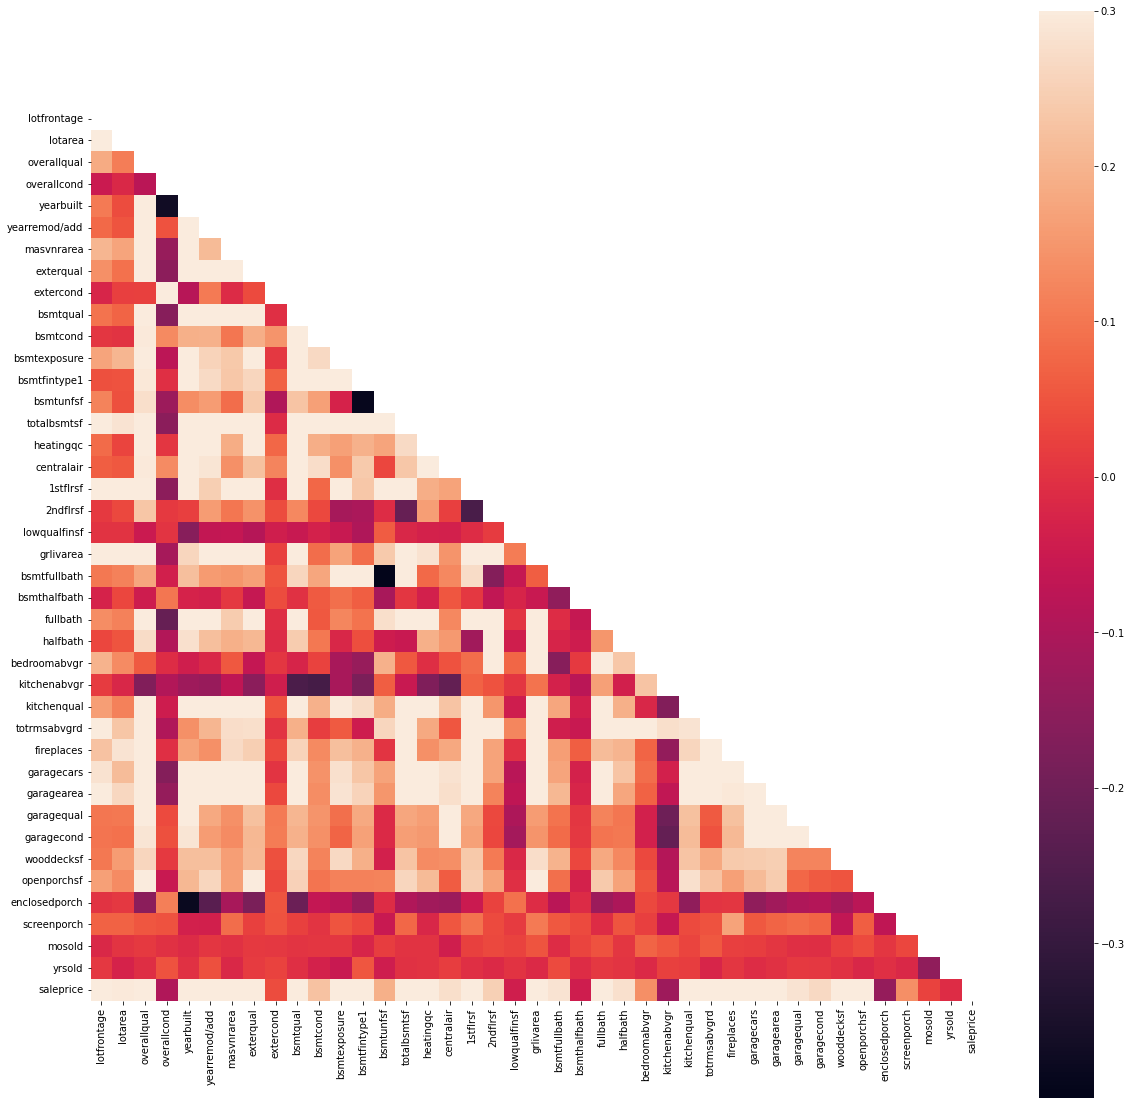

In [51]:
plt.figure(figsize=(20,20))
mask = np.zeros_like(data_train.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data_train.corr(), mask=mask, vmax=.3, square=True);

Let's inspect closer to the correlation matrix and the values with respect to the sale price.

In [52]:
data_train_corr = data_train.corr()
print(data_train.shape)
data_train_corr['saleprice'].sort_values(ascending=False)

(2027, 61)


saleprice        1.000000
overallqual      0.799976
exterqual        0.711835
grlivarea        0.698801
kitchenqual      0.690775
garagearea       0.648282
garagecars       0.646570
totalbsmtsf      0.632005
1stflrsf         0.623557
bsmtqual         0.614974
yearbuilt        0.571776
yearremod/add    0.549174
fullbath         0.538224
masvnrarea       0.512746
totrmsabvgrd     0.505213
fireplaces       0.471279
heatingqc        0.458128
bsmtexposure     0.426299
bsmtfintype1     0.352560
wooddecksf       0.328570
openporchsf      0.325706
lotfrontage      0.324212
lotarea          0.295860
garagequal       0.285067
bsmtfullbath     0.284610
halfbath         0.278577
centralair       0.277704
garagecond       0.264624
2ndflrsf         0.250585
bsmtcond         0.224545
bsmtunfsf        0.191360
bedroomabvgr     0.138295
screenporch      0.137848
extercond        0.038421
mosold           0.026418
yrsold          -0.010933
lowqualfinsf    -0.041131
bsmthalfbath    -0.043807
overallcond 

In [53]:
data_train_corr['saleprice'] > 0.5

lotfrontage      False
lotarea          False
overallqual       True
overallcond      False
yearbuilt         True
yearremod/add     True
masvnrarea        True
exterqual         True
extercond        False
bsmtqual          True
bsmtcond         False
bsmtexposure     False
bsmtfintype1     False
bsmtunfsf        False
totalbsmtsf       True
heatingqc        False
centralair       False
1stflrsf          True
2ndflrsf         False
lowqualfinsf     False
grlivarea         True
bsmtfullbath     False
bsmthalfbath     False
fullbath          True
halfbath         False
bedroomabvgr     False
kitchenabvgr     False
kitchenqual       True
totrmsabvgrd      True
fireplaces       False
garagecars        True
garagearea        True
garagequal       False
garagecond       False
wooddecksf       False
openporchsf      False
enclosedporch    False
screenporch      False
mosold           False
yrsold           False
saleprice         True
Name: saleprice, dtype: bool

In [54]:
data_train_corr['saleprice'] < -0.5

lotfrontage      False
lotarea          False
overallqual      False
overallcond      False
yearbuilt        False
yearremod/add    False
masvnrarea       False
exterqual        False
extercond        False
bsmtqual         False
bsmtcond         False
bsmtexposure     False
bsmtfintype1     False
bsmtunfsf        False
totalbsmtsf      False
heatingqc        False
centralair       False
1stflrsf         False
2ndflrsf         False
lowqualfinsf     False
grlivarea        False
bsmtfullbath     False
bsmthalfbath     False
fullbath         False
halfbath         False
bedroomabvgr     False
kitchenabvgr     False
kitchenqual      False
totrmsabvgrd     False
fireplaces       False
garagecars       False
garagearea       False
garagequal       False
garagecond       False
wooddecksf       False
openporchsf      False
enclosedporch    False
screenporch      False
mosold           False
yrsold           False
saleprice        False
Name: saleprice, dtype: bool

### Distribution

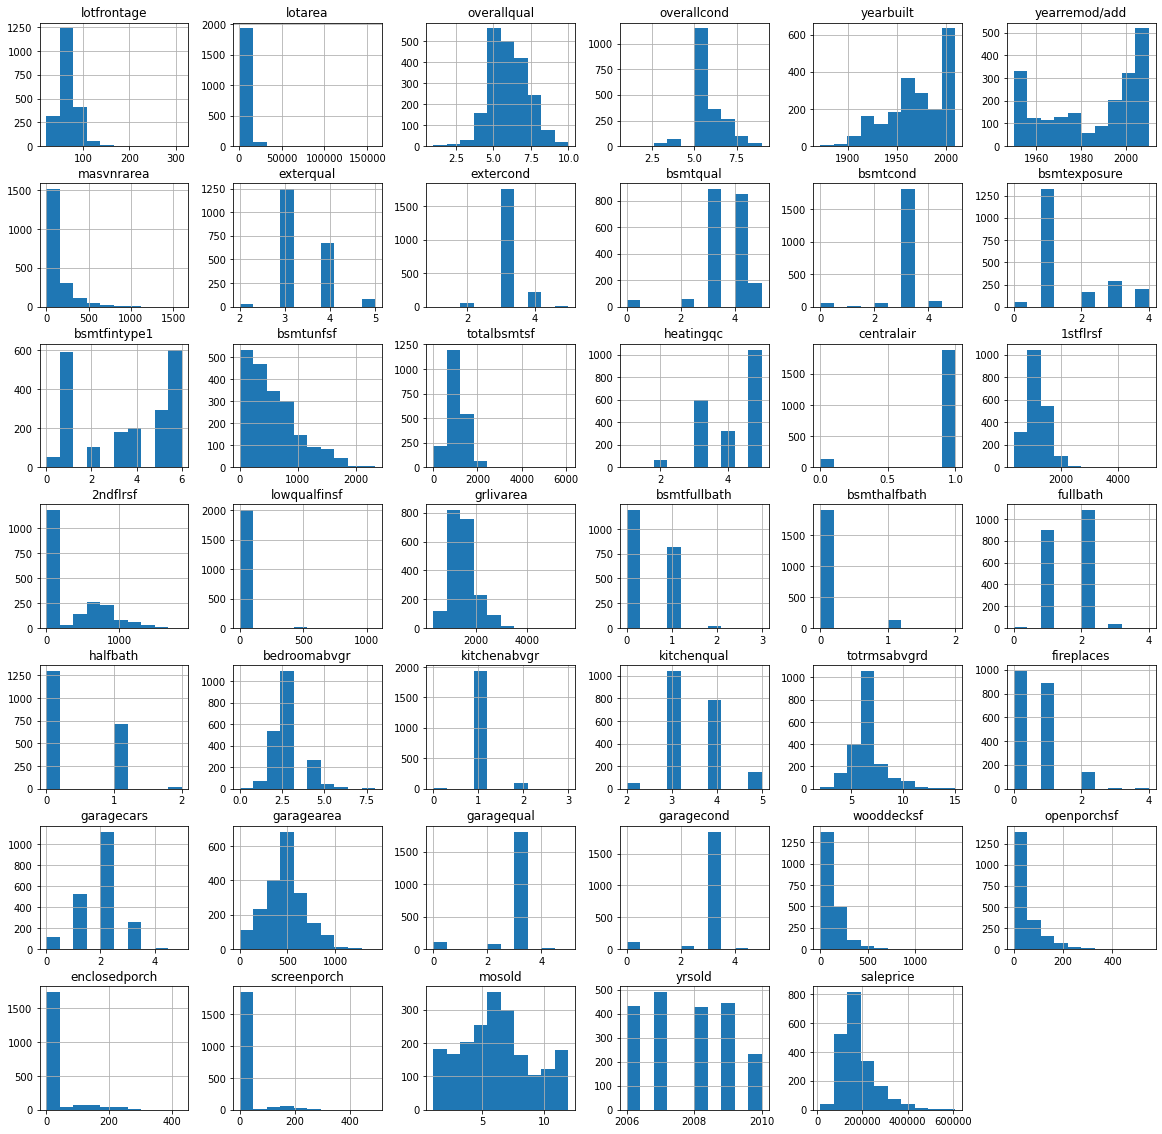

In [55]:
data_train.hist(figsize=(20, 20));

There are no abnormalities with the dataset. It is also very difficult to read, hence we will compare between specific features to see for any visual correlations.

### Scatterplot

Let's compare some features against Sale Price. First, let's choose features which have a strong correlation (see above) - Overall Qual, Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, TotRms AbvGrd, Garage Cars, Garage Area.

#### Overall Quality

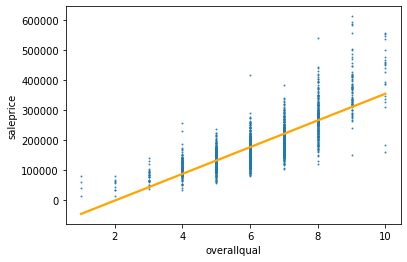

In [56]:
sns.regplot(x='overallqual', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'});

#### Year Built

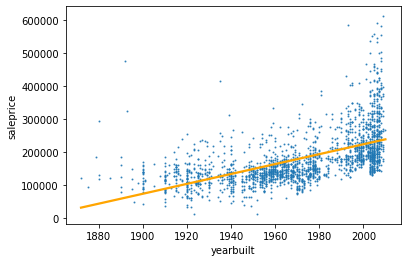

In [57]:
sns.regplot(x='yearbuilt', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'});

#### Year Remodelled/Added

<AxesSubplot:xlabel='yearremod/add', ylabel='saleprice'>

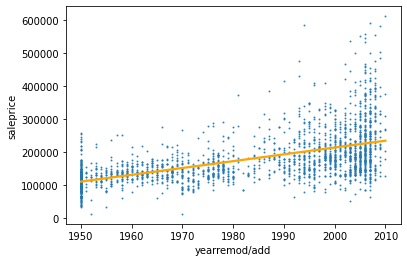

In [58]:
sns.regplot(x='yearremod/add', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### Masonry Veneer Type

<AxesSubplot:xlabel='masvnrarea', ylabel='saleprice'>

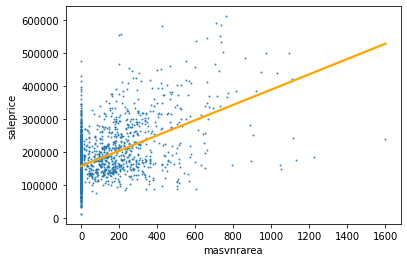

In [59]:
sns.regplot(x='masvnrarea', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### Total Basement SF

<AxesSubplot:xlabel='totalbsmtsf', ylabel='saleprice'>

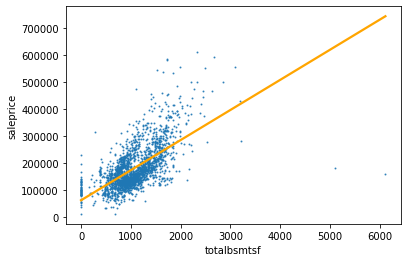

In [60]:
sns.regplot(x='totalbsmtsf', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### 1st Flr SF

<AxesSubplot:xlabel='1stflrsf', ylabel='saleprice'>

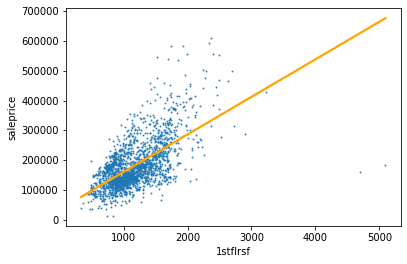

In [61]:
sns.regplot(x='1stflrsf', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### Above grade (ground) living area square feet

<AxesSubplot:xlabel='grlivarea', ylabel='saleprice'>

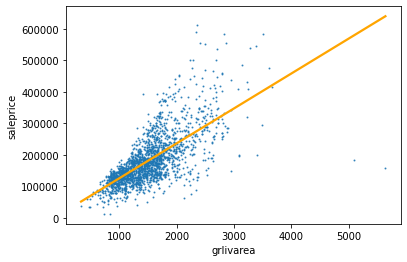

In [62]:
sns.regplot(x='grlivarea', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### Full Bath

<AxesSubplot:xlabel='fullbath', ylabel='saleprice'>

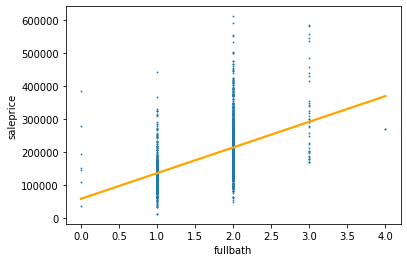

In [63]:
sns.regplot(x='fullbath', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### Total number of Rooms Above Ground

<AxesSubplot:xlabel='totrmsabvgrd', ylabel='saleprice'>

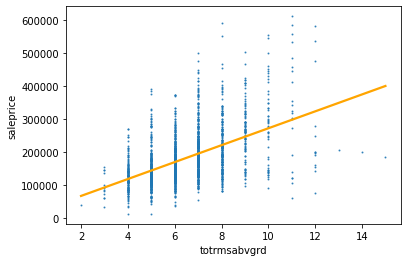

In [64]:
sns.regplot(x='totrmsabvgrd', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### Garage Cars

<AxesSubplot:xlabel='garagecars', ylabel='saleprice'>

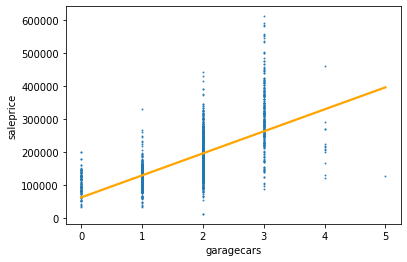

In [65]:
sns.regplot(x='garagecars', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### Garage Area

<AxesSubplot:xlabel='garagearea', ylabel='saleprice'>

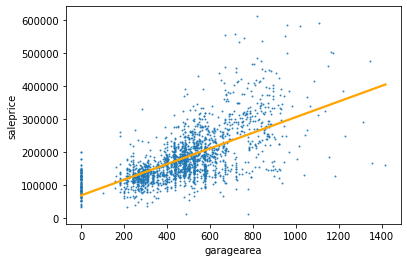

In [66]:
sns.regplot(x='garagearea', y='saleprice', data=data_train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})

#### Number of Houses in each Neighborhood

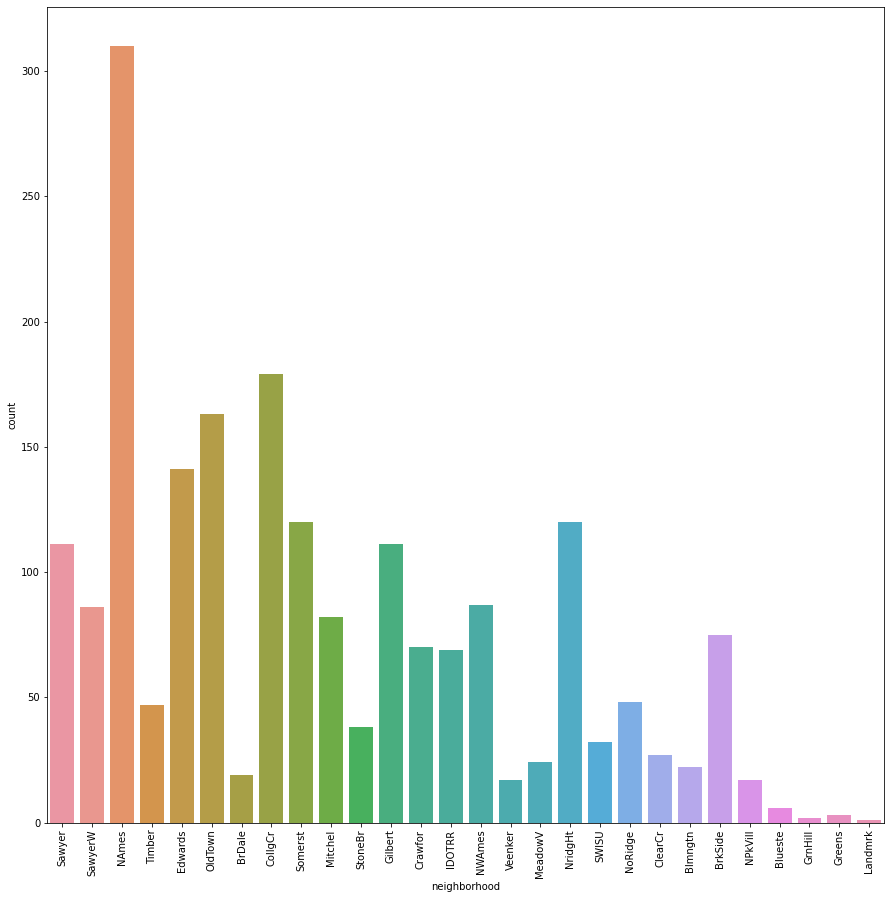

In [67]:
plt.figure(figsize=(15, 15))
ax = sns.countplot(x="neighborhood", data=data_train)
ax.tick_params(axis='x', rotation=90)

#### Sale Prices of Houses according to Neighbourhoods

In [68]:
data_neighborhood = data_train[['neighborhood', 'saleprice']]

In [69]:
data_neighborhood = data_neighborhood.pivot(columns='neighborhood',values='saleprice').fillna(0)

In [70]:
sorted_index = data_neighborhood.median().sort_values().index

In [71]:
sorted_index

Index(['Blmngtn', 'StoneBr', 'Somerst', 'SawyerW', 'Sawyer', 'SWISU',
       'OldTown', 'NridgHt', 'NoRidge', 'NWAmes', 'NPkVill', 'NAmes',
       'Mitchel', 'MeadowV', 'Landmrk', 'IDOTRR', 'GrnHill', 'Greens',
       'Gilbert', 'Edwards', 'Crawfor', 'CollgCr', 'ClearCr', 'BrkSide',
       'BrDale', 'Blueste', 'Timber', 'Veenker'],
      dtype='object', name='neighborhood')

In [72]:
df_sorted=data_neighborhood[sorted_index]

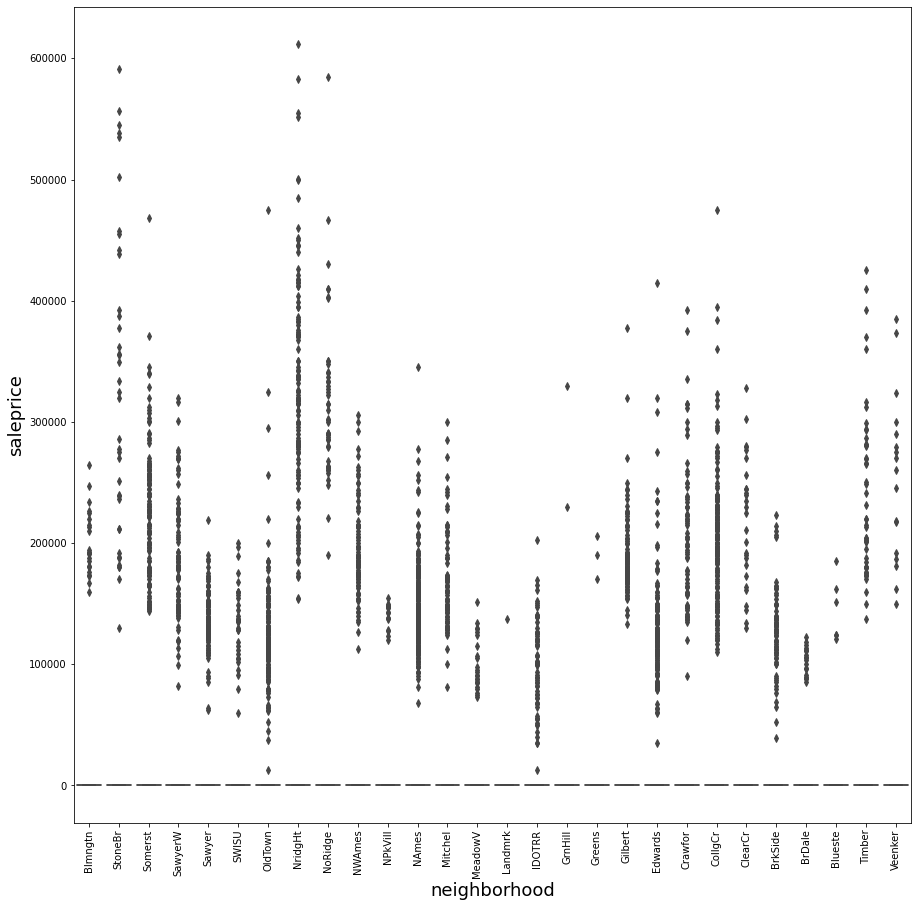

In [73]:
plt.figure(figsize=(15, 15))
sns_neighborhood = sns.boxplot(data=df_sorted)
plt.xlabel('neighborhood', size=18)
plt.ylabel('saleprice', size=18)
sns_neighborhood.tick_params(axis='x', rotation=90)

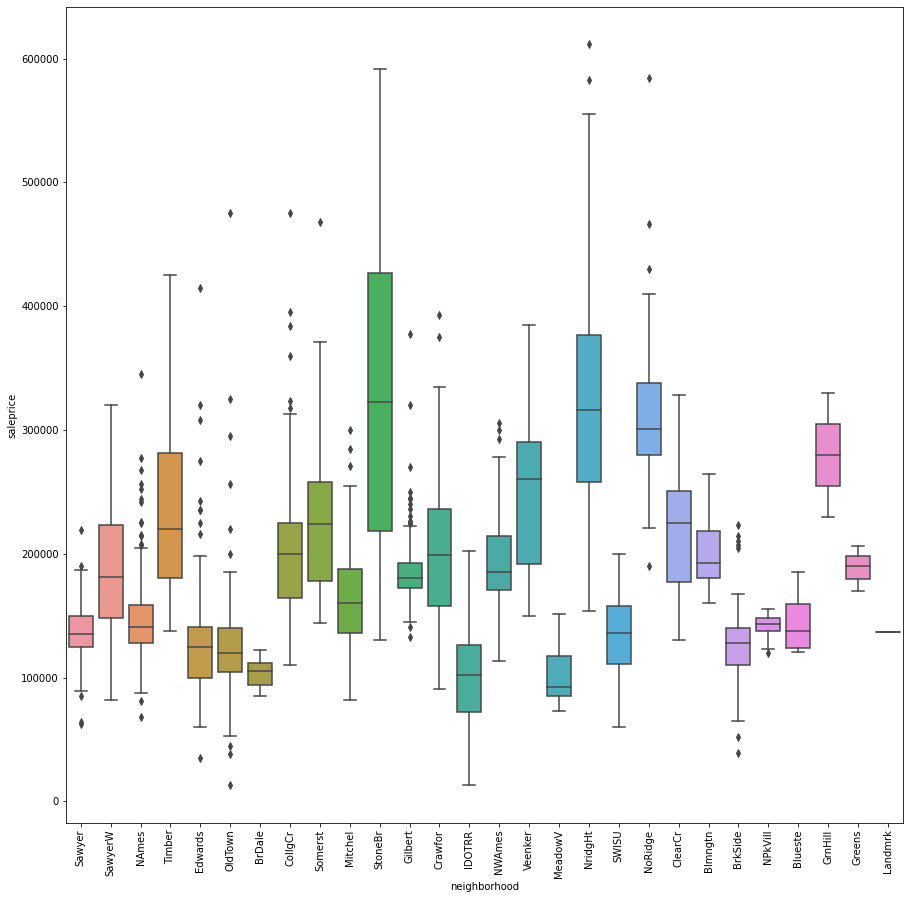

In [74]:
plt.figure(figsize=(15, 15))

ax = sns.boxplot(x="neighborhood", y="saleprice", data=data_train)
ax.tick_params(axis='x', rotation=90)
# slice out the neighbourhood by saleprice
# group by neighbourhood
# sort value by the mean of the neighbourhood

## Pre-Processing and Modeling

Further dummifying the categorical variables... (non-ordinal)

In [75]:
columns = list(data_train.columns)
columns

['mssubclass',
 'mszoning',
 'lotfrontage',
 'lotarea',
 'street',
 'lotshape',
 'landcontour',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'bldgtype',
 'housestyle',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremod/add',
 'roofstyle',
 'exterior1st',
 'masvnrtype',
 'masvnrarea',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtunfsf',
 'totalbsmtsf',
 'heatingqc',
 'centralair',
 'electrical',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'kitchenqual',
 'totrmsabvgrd',
 'functional',
 'fireplaces',
 'garagetype',
 'garagefinish',
 'garagecars',
 'garagearea',
 'garagequal',
 'garagecond',
 'paveddrive',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 'screenporch',
 'mosold',
 'yrsold',
 'saleprice']

In [76]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 109 to 10
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssubclass     2027 non-null   object 
 1   mszoning       2027 non-null   object 
 2   lotfrontage    2027 non-null   float64
 3   lotarea        2027 non-null   int64  
 4   street         2027 non-null   object 
 5   lotshape       2027 non-null   object 
 6   landcontour    2027 non-null   object 
 7   lotconfig      2027 non-null   object 
 8   landslope      2027 non-null   object 
 9   neighborhood   2027 non-null   object 
 10  condition1     2027 non-null   object 
 11  bldgtype       2027 non-null   object 
 12  housestyle     2027 non-null   object 
 13  overallqual    2027 non-null   int64  
 14  overallcond    2027 non-null   int64  
 15  yearbuilt      2027 non-null   int64  
 16  yearremod/add  2027 non-null   int64  
 17  roofstyle      2027 non-null   object 
 18  exterior

In [77]:
columns.remove('saleprice')
columns.remove('neighborhood')
data_train.drop('neighborhood', axis=1, inplace=True)

We don't really know which feature to remove, so we will select all the remaining features after data cleaning.

In [78]:
data_train = pd.get_dummies(data_train, drop_first = True)

In [79]:
data_list = [col for col in data_train.columns if col != 'saleprice']

In [80]:
data_list

['lotfrontage',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremod/add',
 'masvnrarea',
 'exterqual',
 'extercond',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtunfsf',
 'totalbsmtsf',
 'heatingqc',
 'centralair',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'kitchenqual',
 'totrmsabvgrd',
 'fireplaces',
 'garagecars',
 'garagearea',
 'garagequal',
 'garagecond',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 'screenporch',
 'mosold',
 'yrsold',
 'mssubclass_150',
 'mssubclass_160',
 'mssubclass_180',
 'mssubclass_190',
 'mssubclass_20',
 'mssubclass_30',
 'mssubclass_40',
 'mssubclass_45',
 'mssubclass_50',
 'mssubclass_60',
 'mssubclass_70',
 'mssubclass_75',
 'mssubclass_80',
 'mssubclass_85',
 'mssubclass_90',
 'mszoning_C (all)',
 'mszoning_FV',
 'mszoning_I (all)',
 'mszoning_RH',
 'mszoning_RL',
 'mszoning_RM',
 'street_Pave',
 'lo

### Linear Regression (our Baseline Model)

In [81]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score

#### Instantiate The Model

In [82]:
lr = LinearRegression()

In [83]:
X = data_train[data_list]
y = data_train['saleprice']

In [84]:
poly = PolynomialFeatures(include_bias=False)
X_overfit = poly.fit_transform(X)

In [85]:
X.shape

(2027, 142)

In [86]:
# poly.get_feature_names(X.columns)

Unfortunately, my computer hangs when I process polynomial features, hence I will not be able to analyse interaction terms in this project.

In [87]:
# X_overfit.shape

While it is not necessary to train-test-split in this project as we will be comparing this train data to the one on Kaggle, I will still proceed to create a training and validation data set to see the effectiveness of the model. The training and validation ratio split will be 75-25 (default). A bit of caution is that the dataset isn't considered large to begin with.
<br><br>
We shall use X_valid and y_valid instead of X_test and y_test to prevent confusion.

In [88]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

In [89]:
print(X_train.shape)
print(X_valid.shape)

(1520, 142)
(507, 142)


We will scale our features, so that features will not be too large till it affects the model greatly. This scaled X_train and X_valid will be scaled to X_train_sc and X_valid_sc for all the models that we'll be using.

In [90]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_valid_sc = ss.transform(X_valid)

#### Fit the Model

In [91]:
model = lr.fit(X_train_sc,y_train)
score = model.score(X_train_sc,y_train)

ls_predictions = model.predict(X_train_sc)

C:\Users\ilove\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

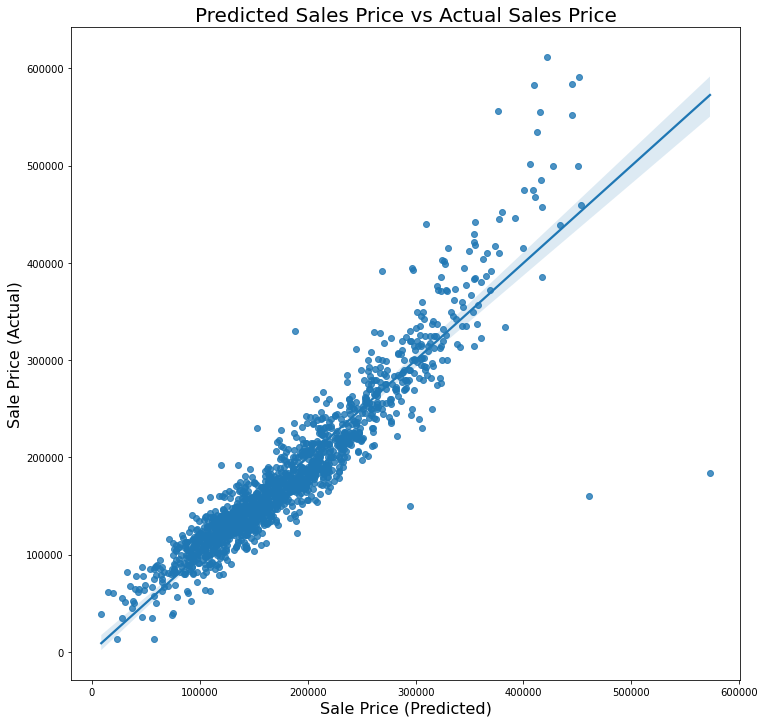

In [92]:
plt.figure(figsize = (12,12))
ax = sns.regplot(ls_predictions, y_train)
ax.plot()
ax.set_title('Predicted Sales Price vs Actual Sales Price', size = 20)
ax.set_ylabel('Sale Price (Actual)', size = 16)
ax.set_xlabel('Sale Price (Predicted)', size = 16)
plt.yticks(size = 10)
plt.xticks(size = 10)

In [93]:
print(lr.score(X_train_sc, y_train))
print(lr.score(X_valid_sc, y_valid))

0.8689122980728214
-2.0105747201971294e+19


R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line. So Linear Regression is not the best model.

In [94]:
print('R^2: ', metrics.r2_score(y_train, ls_predictions))
print('RMSE: ', metrics.mean_squared_error(y_train, ls_predictions, squared=False))

R^2:  0.8689122980728214
RMSE:  28992.76274457997


Linear Regression is too simplistic of a model. We shall try out Ridge, Lasso and ElasticNet.

The Least Squares Regression Line/linear regression is the line that makes the vertical distance from the data points to the regression line as small as possible. It's called a “least squares” because the best line of fit is one that minimizes the variance (the sum of squares of the errors).

### Ridge Regression

In [95]:
from sklearn.linear_model import Ridge, RidgeCV

In [96]:
r_alphas = np.logspace(-3, 0, 100)

In [97]:
ridge_cv = RidgeCV(alphas=r_alphas, scoring = 'r2', cv=5).fit(X_train_sc, y_train)

In [98]:
ridge_predictions = ridge_cv.predict(X_train_sc)

In [99]:
print(ridge_cv.score(X_train_sc, y_train))
print(ridge_cv.score(X_valid_sc, y_valid))

0.8688971800882028
0.891960308611282


In [100]:
print('R^2: ', metrics.r2_score(y_train, ridge_predictions))
print('RMSE: ', metrics.mean_squared_error(y_train, ridge_predictions, squared=False))
print('RMSE: ', metrics.mean_squared_error(y_valid, ridge_cv.predict(X_valid_sc), squared=False))

R^2:  0.8688971800882028
RMSE:  28994.43452422892
RMSE:  24979.488670106817


In [101]:
ridge_cv.alpha_

1.0

### Lasso Regression

In [102]:
from sklearn.linear_model import Lasso, LassoCV

In [103]:
l_alphas = np.logspace(-3, 0, 100)
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=100000).fit(X_train_sc, y_train);

C:\Users\ilove\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014711169.5466309, tolerance: 803154001.1955776
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ilove\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014389100.3283691, tolerance: 803154001.1955776
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ilove\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014097411.7056885, tolerance: 803154001.1955776
  model = cd_fast.enet_coordinate_descent_gram(


In [104]:
lasso_predictions = lasso_cv.predict(X_train_sc)

In [105]:
print('R^2: ', metrics.r2_score(y_train, lasso_predictions))
print('RMSE: ', metrics.mean_squared_error(y_train, lasso_predictions, squared=False))
print('RMSE: ', metrics.mean_squared_error(y_valid, lasso_cv.predict(X_valid_sc), squared=False))

R^2:  0.8689043229426068
RMSE:  28993.644663852774
RMSE:  24965.4693547495


In [106]:
print(lasso_cv.score(X_train_sc, y_train))
print(lasso_cv.score(X_valid_sc, y_valid))

0.8689043229426068
0.8920815454781326


In [107]:
lasso_cv.alpha_

1.0

### ElasticNet Regression

In [108]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [109]:
enet_alphas = np.linspace(0.5, 1.0, 100)

In [110]:
enet_model = ElasticNetCV(alphas=enet_alphas, cv=5)

In [111]:
enet_model = enet_model.fit(X_train_sc, y_train)

In [112]:
enet_predictions = enet_model.predict(X_train_sc)

In [113]:
enet_model_preds = enet_model.predict(X_valid_sc)
enet_model_preds_train = enet_model.predict(X_train_sc)

In [114]:
print(enet_model.score(X_train_sc, y_train))
print(enet_model.score(X_valid_sc, y_valid))

0.858050127344571
0.8952323861356212


In [115]:
print('R^2: ', metrics.r2_score(y_train, enet_predictions))
print('RMSE: ', metrics.mean_squared_error(y_train, enet_predictions, squared=False))
print('RMSE: ', metrics.mean_squared_error(y_valid, enet_model.predict(X_valid_sc), squared=False))

R^2:  0.858050127344571
RMSE:  30170.056968969442
RMSE:  24598.31751109648


In [116]:
enet_model.alpha_

0.5757575757575758

#### Summary

In [117]:
ridge_cv.coef_

array([-2.11832576e+02,  2.39367150e+03,  1.62960221e+04,  5.46005147e+03,
        6.05631459e+03,  3.66564729e+02,  7.43097182e+03,  7.43099970e+03,
       -8.32006434e+02,  6.78330774e+03, -2.92662994e+03,  4.89895051e+03,
        3.68703543e+03, -1.15560263e+03, -1.25239283e+03,  6.34297868e+02,
       -9.03149101e+02,  7.01941843e+03,  1.02633357e+04,  5.57299266e+02,
        1.41269607e+04,  4.37368539e+03, -9.13849852e+02,  1.76911287e+03,
        5.77464837e+02, -2.41692162e+03, -3.48397094e+03,  6.37021342e+03,
        6.08968412e+03,  4.34993175e+03,  5.95598526e+03,  4.38145262e+03,
        6.80881259e+03,  6.20133470e+02,  7.99781867e+02, -9.96860829e+02,
        1.62779487e+01,  4.33550872e+03, -6.44507199e+02, -1.21055713e+03,
       -2.21220732e+03,  2.18772433e+02,  2.81556479e+02,  8.59658101e+02,
        8.38380392e+03,  5.11977187e+03,  1.09840758e+03,  1.41612488e+03,
        7.07865868e+03,  5.27672872e+03,  3.86430665e+03,  1.83881752e+03,
        3.26846149e+03,  

In [118]:
lasso_cv.coef_

array([-1.98090438e+02,  2.38173328e+03,  1.63195543e+04,  5.47218096e+03,
        6.09493437e+03,  3.53141690e+02,  7.42849207e+03,  7.43368441e+03,
       -8.35440076e+02,  6.78056007e+03, -2.94011661e+03,  4.90976134e+03,
        3.67778428e+03, -1.14996258e+03, -1.28127363e+03,  6.20666876e+02,
       -8.98821797e+02,  1.45331351e+04,  1.84159730e+04,  1.45176105e+03,
        4.54440294e+03,  4.39234998e+03, -9.03228511e+02,  1.74589441e+03,
        5.57234813e+02, -2.42354115e+03, -3.48761472e+03,  6.35922008e+03,
        6.08219418e+03,  4.35098321e+03,  5.99194756e+03,  4.33818650e+03,
        6.90960451e+03,  6.46562881e+02,  7.88017469e+02, -1.00418298e+03,
        1.56802362e+01,  4.33353976e+03, -6.35993882e+02, -1.20779063e+03,
       -2.20377245e+03,  3.13806177e+02,  2.93028247e+02,  1.70564600e+01,
        9.70077748e+03,  5.72985352e+03,  1.24835165e+03,  1.68741502e+03,
        8.09540136e+03,  6.49775408e+03,  4.49830916e+03,  2.10358169e+03,
        3.83454758e+03,  

In [119]:
enet_model.coef_

array([ 8.28232214e+02,  2.22748377e+03,  1.09019541e+04,  3.12060864e+03,
        2.59886661e+03,  2.20082764e+03,  6.19631300e+03,  6.91473089e+03,
       -1.46889018e+01,  4.44635691e+03, -1.25041037e+03,  4.24303621e+03,
        3.34114661e+03, -9.13691489e+02,  3.49295927e+03,  1.62695433e+03,
        1.14687383e+02,  6.23736909e+03,  4.05108489e+03, -3.99835734e+00,
        8.25967282e+03,  3.45212279e+03, -1.09184457e+03,  3.16350554e+03,
        1.52136635e+03, -3.71808231e+02, -1.55112955e+03,  6.77588986e+03,
        4.97848437e+03,  4.78379427e+03,  4.55302242e+03,  5.40956826e+03,
        1.01963936e+03, -1.91197843e+02,  1.68001299e+03,  3.21081804e+02,
        2.08450386e+02,  3.74028123e+03, -1.80023160e+02, -7.81055869e+02,
       -1.29891883e+03, -1.46723484e+03, -3.78750835e+02, -4.33284234e+02,
        1.42428303e+03,  4.36219012e+02,  4.98589894e+01,  2.27025660e+02,
        8.63179569e+02,  4.54996136e+02,  6.90788122e+00,  9.24117757e+02,
       -9.51775900e+02, -

In [120]:
print(" OLS ".center(18, "="))
print(lr.score(X_train_sc, y_train))
print(lr.score(X_valid_sc, y_valid))
print()
print(" Ridge ".center(18, "="))
print(ridge_cv.score(X_train_sc, y_train))
print(ridge_cv.score(X_valid_sc, y_valid))
print('RMSE: ', metrics.mean_squared_error(y_valid, ridge_cv.predict(X_valid_sc), squared=False))
print()
print(" Lasso ".center(18, "="))
print(lasso_cv.score(X_train_sc, y_train))
print(lasso_cv.score(X_valid_sc, y_valid))
print('RMSE: ', metrics.mean_squared_error(y_valid, lasso_cv.predict(X_valid_sc), squared=False))
print()
print(" ElasticNet ".center(18, "="))
print(enet_model.score(X_train_sc, y_train))
print(enet_model.score(X_valid_sc, y_valid))
print('RMSE: ', metrics.mean_squared_error(y_valid, enet_model.predict(X_valid_sc), squared=False))

====== OLS =======
0.8689122980728214
-2.0105747201971294e+19

===== Ridge ======
0.8688971800882028
0.891960308611282
RMSE:  24979.488670106817

===== Lasso ======
0.8689043229426068
0.8920815454781326
RMSE:  24965.4693547495

=== ElasticNet ===
0.858050127344571
0.8952323861356212
RMSE:  24598.31751109648


In [121]:
cdf = pd.DataFrame(enet_model.coef_, X.columns, columns=['Coefficients'])

In [122]:
cdf.sort_values(by='Coefficients', ascending=True).head(5)

,Coefficients
lotshape_IR3,-3682.909255
exterior1st_Stucco,-2418.782855
roofstyle_Mansard,-1907.953395
bldgtype_TwnhsE,-1866.326782
bldgtype_Twnhs,-1812.455048


In [123]:
cdf.sort_values(by='Coefficients', ascending=False).head(5)

,Coefficients
overallqual,10901.954148
grlivarea,8259.672824
exterqual,6914.730890
kitchenqual,6775.889857
1stflrsf,6237.369088


# Conclusion and Analysis

It is important to investigate why the house features are affecting sale price, especially for homeowners and homebuyers. For homeowners, they need to know whether their property still has the "selling qualities" to remain competitive in the market, but they will need to know what to improve on the most during renovation works. For homeowners, they would want the best bang for their buck when purchasing a home.
<br><br>
This model is only applicable to Ames, Iowa. It is a university town, so the population is undoubtedly younger. Iowa, as a state, focuses on agriculture, so this model may not be applicable in another town in Iowa or another state altogether.
<br><br>
To evaluate the success of this model, we will need to see what are the features that will greatly affect the Sale Price positively/negatively.
<br><br>
In this model, ElasticNetCV performs the best with the lowest RMSE score of $24562 to the average.

## Selecting ElasticNetCV - Why?

Lasso assigns a penalty to the coefficients in the linear model, eliminating variables with coefficients that zero. It doesn't perform well when there is multicollinearity in the features. By glancing at the features, some of them are greatly related to each other. As for Ridge, it reduces the penalty closer to 0, but it might not be enough as there are too many features compared to the number of observations.
<br><br>
In this situation, ElasticNet performs the best.
<br><br>
ElasticNet reduces the impact of different features while not eliminating all of the features. It combines both Lasso and Ridge features, but not completely removing any feature.

## Understanding Coefficients

By viewing the top 5 that positively affect Sale Prices and bottom 5 features that negatively affect Sale Prices, homebuyers should consider these factors when purchasing a home in Ames, Iowa and what homeowners should consider to put their property in a competitive position in the housing market:
<br><br>
<li>Purchasing a house situated on a lot that has irregular shape will affect the Sale Price negatively by \$3682.90 for every unit increase. It affects the sale price the most. This means that irregular shaped lots are priced lower in the market. Homeowners can't really change much about this aspect, hence they should focus more on the features of the house.
<br><br>
<li>The exterior covering of the house matters - if it is made out of Stucco, the house is more likely to be priced lower as well. For every unit increase, the price will decrease by $2418.78. Same goes for having a Mansard roofstyle, which decreases the sale price by \$1907.95 for every unit increase. We do not have the domain knowledge to understand if a Stucco material is high or low quality, hence both homeowners and homebuyers should consider if the material is what they want. For a Mansard roofstyle, it may not suit the current trend if the houses are old, hence the price may be lower. Homeowners may consider to renovate to other roofstyles to boost their sale prices.
<br><br>
<li>Potential homebuyers should also consider purchasing Townhouses as they are cheaper on the market compared to Single-family Detached, two-family conversion houses and duplexes. 
<br><br>
<li>As for the features that positively affect the Sale Price, an increase in the overall quality of the house will undoubtedly improve Sale Prices per unit increase by \$10901.95. Similarly, the exterior matters a lot, which improve sale prices by \$6914.73 per unit increase. Same goes for kitchen quality as well, increasing at a rate of \$6775.88 as the quality increases.
<br><br>
<li>As for the general living area, the greater the square footage, the sale price increases by \$8259.67 per unit increase. This also affects the 1st floor square footage, which increases by \$6237.36 per unit increase.

# Recommendations: Improving This Model

At the end of the day, this model is only applicable to Ames, Iowa. Below are the suggested improvements and special sidenotes to this model:
<br><br>
<li>Collect more data that is up-to-date.
<li>Remove features that are too specific or combine subfeatures.
<li>Add features that are beyond just the house features such as distance to schools or public transportation hubs.
<li>Consider socio-economic factors such as crime rates or quality of schools.
<li>Ames is a university town, hence this model after improvement may be used in similar university towns. However, the whole state of Iowa is known to focus on agriculture, hence the model (as good as it may be after improvement), might not be the best to use on towns that do not specialise in agriculture or are on flat land (e.g. Florida).